In [2]:
from data.datamodule import CLaMPDataModule
from datasets import load_dataset
from transformers.models.graphormer.collating_graphormer import preprocess_item, GraphormerDataCollator
from transformers import AutoTokenizer

/home/yj/anaconda3/envs/llamat/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
dataset = load_dataset('parquet', data_files='/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials.parquet')


In [23]:
import pandas as pd
df = pd.read_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials_graphs_gpt.parquet')
df['text'] = df['gpt_text'] + df['gpt_explanation']
df.to_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials_graphs_gpt.parquet')

In [20]:
import pandas as pd
# df = pd.read_json('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials.json')
df.to_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials.parquet')

In [22]:
from jarvis.core.atoms import Atoms
Atoms.from_dict(df['atoms'][0])


ValueError: setting an array element with a sequence.

In [8]:
import torch
gt_logits = torch.randn(5, 5)
# gt_logits = torch.eye(5)
print(gt_logits)
self_mask = torch.eye(gt_logits.shape[0], device=gt_logits.device, dtype=torch.bool)
print(self_mask.shape)
comb_sim = torch.cat([gt_logits[self_mask][:,None], gt_logits.masked_fill(self_mask, -torch.inf)], dim=-1)
print(comb_sim.shape, comb_sim)
sim_argsort = comb_sim.argsort(dim=-1, descending=True).argmin(dim=-1)
print(comb_sim.argsort(dim=-1, descending=True))
print(sim_argsort.shape, sim_argsort)

tensor([[ 1.1489, -1.4931,  0.4383, -1.3485, -1.6189],
        [-2.3389, -0.9827,  1.3691, -0.0875,  0.2425],
        [-0.1880,  0.5527,  0.8310,  1.3379, -1.6811],
        [ 0.8298,  1.8151,  0.8688,  0.4391,  0.0744],
        [-2.5931,  0.7871,  1.2203, -0.1033, -0.3461]])
torch.Size([5, 5])
torch.Size([5, 6]) tensor([[ 1.1489,    -inf, -1.4931,  0.4383, -1.3485, -1.6189],
        [-0.9827, -2.3389,    -inf,  1.3691, -0.0875,  0.2425],
        [ 0.8310, -0.1880,  0.5527,    -inf,  1.3379, -1.6811],
        [ 0.4391,  0.8298,  1.8151,  0.8688,    -inf,  0.0744],
        [-0.3461, -2.5931,  0.7871,  1.2203, -0.1033,    -inf]])
tensor([[0, 3, 4, 2, 5, 1],
        [3, 5, 4, 0, 1, 2],
        [4, 0, 2, 1, 5, 3],
        [2, 3, 1, 0, 5, 4],
        [3, 2, 4, 0, 1, 5]])
torch.Size([5]) tensor([0, 3, 1, 3, 3])


In [9]:
import numpy as np
np.bool

/tmp/ipykernel_2005451/2052362676.py:2: FutureWarning: In the future `np.bool` will be defined as the corresponding NumPy scalar.
  np.bool


AttributeError: module 'numpy' has no attribute 'bool'.
`np.bool` was a deprecated alias for the builtin `bool`. To avoid this error in existing code, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [12]:
import pandas as pd
df = pd.read_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials_graphs_gpt.parquet')
df['y'] = df['y'].apply(lambda x: [0])
df.to_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials_graphs_gpt.parquet')

In [8]:
from data.utils import jarvis_atoms2graph
def preprocess_func(item):
    entities = {}
    entities['graph'] = jarvis_atoms2graph(item['atoms'])
    return entities


In [9]:
dataset['train'][0]['atoms']

{'abc': [7.833244, 7.833245, 7.83325],
 'angles': [60.0, 60.0, 60.0],
 'cartesian': False,
 'coords': [[0.75, 0.75, 0.75],
  [0.25, 0.25, 0.25],
  [0.5, 0.5, 0.5],
  [0.0, 0.0, 0.0],
  [0.742702, 0.25729799999999997, 0.25729799999999997],
  [0.25729799999999997, 0.25729799999999997, 0.742702],
  [0.25729799999999997, 0.742702, 0.742702],
  [0.25729799999999997, 0.742702, 0.25729799999999997],
  [0.742702, 0.25729799999999997, 0.742702],
  [0.742702, 0.742702, 0.25729799999999997]],
 'elements': ['Cs', 'Cs', 'Cu', 'Sb', 'Br', 'Br', 'Br', 'Br', 'Br', 'Br'],
 'lattice_mat': [[6.7837932604, 0.0, 3.916624865],
  [2.2612644201, 6.3958216221, 3.916624865],
  [0.0, 0.0, 7.83324973]],
 'props': ['', '', '', '', '', '', '', '', '', '']}

In [10]:
dataset['train'].map(preprocess_func, batched=False)

Map:   0%|          | 0/126335 [00:00<?, ? examples/s]

Map: 100%|██████████| 126335/126335 [50:11<00:00, 41.95 examples/s]  


Dataset({
    features: ['atoms', 'space group symbol', 'crystal system', 'energy per atom', 'volume', 'formation energy per atom', 'pretty formula', 'energy above hull', 'band gap', 'density', 'total magnetization', 'oxide type', 'scintillation attenuation length', 'enthalpy per atom', 'gpt_text', 'gpt_explanation', 'reduced_formula', '__index_level_0__', 'graph'],
    num_rows: 126335
})

In [3]:
dataset['train']

Dataset({
    features: ['atoms', 'space group symbol', 'crystal system', 'energy per atom', 'volume', 'formation energy per atom', 'pretty formula', 'energy above hull', 'band gap', 'density', 'total magnetization', 'oxide type', 'scintillation attenuation length', 'enthalpy per atom', 'gpt_text', 'gpt_explanation', 'reduced_formula'],
    num_rows: 1
})

In [15]:
dataset['train'][0]['node_feat']

KeyError: 'node_feat'

In [11]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('allenai/scibert_scivocab_cased')
tokenizer.mask_token_id

103

In [10]:
tokenizer(dataset['train'][0]['gpt_text'], return_tensors='pt', padding='max_length', truncation=True)['input_ids'].shape

torch.Size([1, 512])

In [ ]:
# LOAD하고 PREPROCESS단계에서 GRAPH제작 가능?

In [6]:
import pandas as pd

df = pd.read_json('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials_graphs_gpt.json')
df['y'] = 0
df.to_parquet('/home/yj/PycharmProjects/MIT/CLaMP/jsons/mp_3d_2020_materials_graphs_gpt.parquet')

In [15]:
df['num_nodes'].max()

444

In [13]:
df

,atoms,space group symbol,crystal system,energy per atom,volume,formation energy per atom,pretty formula,energy above hull,band gap,density,...,scintillation attenuation length,enthalpy per atom,gpt_text,gpt_explanation,reduced_formula,edge_index,edge_attr,num_nodes,node_feat,y
0,"{'lattice_mat': [[6.7837932604, 0.0, 3.9166248...",Fm-3m,cubic,-3.026985,339.868503,-1.042928,Cs2CuSbBr6,0.037415,0.4582,4.546463,...,2.649453,-3.037248,Cs2CuSbBr6 is a cubic crystalline material wit...,"Cs2CuSbBr6 has a band gap of 0.4582 units, whi...",Cs2CuSbBr6,"[[0, 6, 0, 6, 0, 8, 0, 8, 0, 5, 0, 5, 0, 7, 0,...","[[3.4249005318, -0.0466766953, 1.9011429548], ...",10,"[[55.0], [55.0], [29.0], [51.0], [35.0], [35.0...",0
1,"{'lattice_mat': [[2.930707, 0.0, 1.794540473e-...",Pm-3m,cubic,-5.957301,25.171970,-0.140069,TiBe,0.005377,0.0000,3.752194,...,3.392792,-5.972252,The substance with the database entry listed a...,Possible applications of this material include...,TiBe,"[[0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,...","[[1.4653550386, -1.4653550386, 1.4653550386], ...",2,"[[22.0], [4.0]]",0
2,"{'lattice_mat': [[4.102914, 0.0, 2.512310249e-...",Pnma,orthorhombic,-5.629226,152.998194,-0.501786,TmNi,0.000000,0.0000,9.882065,...,1.256031,-6.215814,The substance is a crystalline material with a...,"Based on the properties described, TmNi can ha...",TmNi,"[[0, 4, 0, 4, 0, 6, 0, 6, 0, 5, 0, 5, 0, 7, 0,...","[[0.0, 2.6543180942999998, -0.9924864769], [0....",8,"[[69.0], [69.0], [69.0], [69.0], [28.0], [28.0...",0
3,"{'lattice_mat': [[3.0181361211, 0.0, -0.274264...",P1,triclinic,-5.817627,218.729028,-1.860331,Li7Mn2(CoO4)3,0.127803,0.2377,4.002799,...,3.078713,-5.301644,The substance is a solid material with the che...,The substance Li7Mn2(CoO4)3 has properties tha...,Li7Mn2Co3O12,"[[0, 18, 0, 18, 0, 23, 0, 12, 0, 12, 0, 14, 0,...","[[1.5338112116, -0.17545863990000002, 1.318739...",24,"[[3.0], [3.0], [3.0], [3.0], [3.0], [3.0], [3....",0
4,"{'lattice_mat': [[7.3699197836, 0.0, 4.0552700...",R3,trigonal,-6.749444,432.054775,-2.047105,Mn3CoNi2(PO4)6,0.199451,0.0000,3.501150,...,3.508956,-6.156460,The substance with the pretty formula Mn3CoNi2...,It is challenging to provide specific applicat...,Mn3CoNi2P6O24,"[[0, 23, 0, 31, 0, 20, 0, 14, 0, 25, 0, 18, 0,...","[[-0.5349786878, 1.6836606264, 0.7573206425], ...",36,"[[25.0], [25.0], [25.0], [27.0], [28.0], [28.0...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126330,"{'lattice_mat': [[5.1795495, 0.0, 3.171559358e...",Cmcm,orthorhombic,-5.416528,238.120897,-0.574610,Fe2O3,1.332748,0.0000,4.454351,...,2.478217,-6.654833,The substance in question is an orthorhombic m...,"Based on the properties described, the materia...",Fe2O3,"[[0, 11, 0, 15, 0, 15, 0, 14, 0, 9, 0, 9, 0, 0...","[[-1.0046907663, 0.3061338067, 1.5930907726], ...",20,"[[26.0], [26.0], [26.0], [26.0], [26.0], [26.0...",0
126331,"{'lattice_mat': [[7.7202419687, 0.0, 1.6693141...",C2,monoclinic,-6.171699,691.809324,-1.918218,Bi6P2O15,0.104265,0.0000,7.468825,...,0.971734,-5.502181,The material with the formula Bi6P2O15 has a c...,Bi6P2O15 is a type of bismuth-based phosphate ...,Bi6P2O15,"[[0, 28, 0, 32, 0, 24, 0, 42, 0, 42, 0, 25, 0,...","[[-0.0793685019, 0.4460204244, -2.1458747387],...",46,"[[83.0], [83.0], [83.0], [83.0], [83.0], [83.0...",0
126332,"{'lattice_mat': [[5.2010253161, 0.0, 2.8640691...",C2/m,monoclinic,-6.199617,151.916594,-0.797180,Ca2CoN2,0.000000,0.0000,3.653062,...,3.490621,-5.337430,The material stored in the database has a comp...,Possible application areas for Ca2CoN2 materia...,Ca2CoN2,"[[0, 8, 0, 6, 0, 6, 0, 7, 0, 9, 0, 5, 0, 4, 0,...","[[1.6311130524, 0.8820350766, -1.546333909], [...",10,"[[20.0], [20.0], [20.0], [20.0], [27.0], [27.0...",0
126333,"{'lattice_mat': [[5.634207, 0.0, 3.44995678400...",P2_1/c,monoclinic,-6.263142,235.009843,-2.022086,Ca2CuIrO6,0.000000,0.0000,6.103680,...,1.444930,-5.569069,The material with the ID number 126333 in the ...,"Based on the properti

In [8]:
# df['gpt_text'][0]
encode = tokenizer(df['gpt_explanation'][0], return_tensors='pt')['input_ids']
tokenizer.decode(encode[0])

'[CLS] cs2cusbbr6 has a band gap of 0. 4582 units, which classifies it as a semiconductor. this material can be used in different electrical applications, such as light - emitting diodes ( leds ), solar cells, and transistors. the semiconductor features of cs2cusbbr6 make it possible for it to be used as a light - emitting layer or as a buffer layer in leds. solar cells require a material with high efficiency in converting solar energy into electricity, and the unique properties of this material make it suitable for use as a semiconductor in solar cells. cs2cusbbr6 has a scintillation attenuation length of 2. 649453 units, which means that it can absorb and re - emit light. this property makes it an ideal material for radiation detectors and imaging applications. the material can also be used in radiation therapy and positron emission tomography ( pet ) imaging. finally, the stability and low formation energy per atom of cs2cusbbr6 make it a promising candidate for energy storage appli

In [9]:
len(df['gpt_explanation'][0]), len(encode[0])

(1381, 294)

In [11]:
# shuffle dataframe 
df = df.sample(frac=0.01).reset_index(drop=True)
df['length_exp'] = df['gpt_explanation'].apply(lambda x: len(tokenizer(x, return_tensors='pt')['input_ids'][0]))

In [13]:
df['length_txt'] = df['gpt_text'].apply(lambda x: len(tokenizer(x, return_tensors='pt')['input_ids'][0]))
df['length_txt'].describe()

count    1263.000000
mean      232.212193
std        56.179523
min       141.000000
25%       189.000000
50%       217.000000
75%       265.500000
max       487.000000
Name: length_txt, dtype: float64

<Axes: >

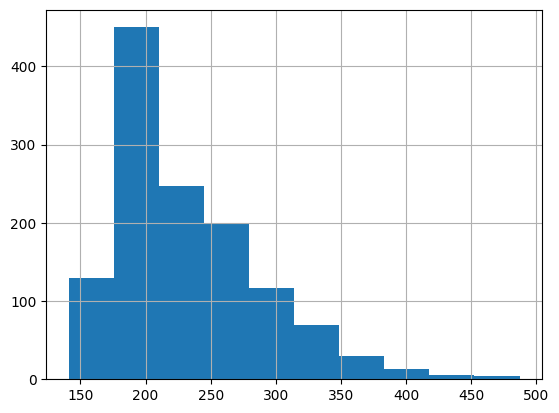

In [14]:
df['length_txt'].hist()

<Axes: >

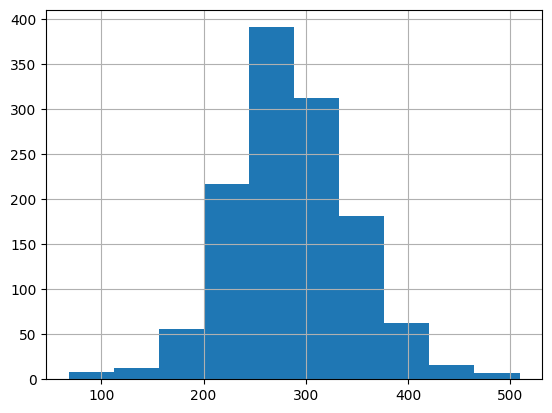

In [15]:
df['length_exp'].describe()
df['length_exp'].hist()

In [16]:
df['gpt'] = df['gpt_explanation'] + df['gpt_text']

In [17]:
df['length_gpt'] = df['gpt'].apply(lambda x: len(tokenizer(x, return_tensors='pt')['input_ids'][0]))
df['length_gpt'].describe()

count    1263.000000
mean      516.660333
std        79.137042
min       250.000000
25%       465.000000
50%       511.000000
75%       563.500000
max       947.000000
Name: length_gpt, dtype: float64

<Axes: >

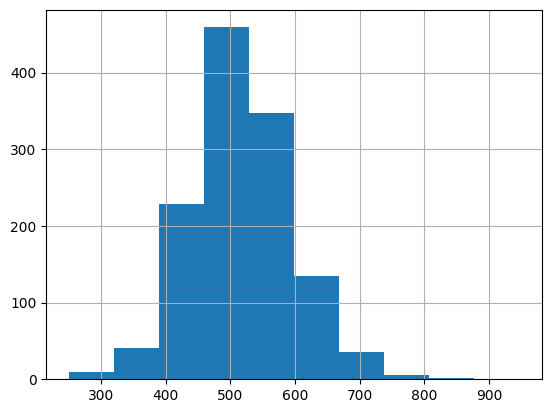

In [18]:
df['length_gpt'].hist()

In [30]:
df = pd.read_json('/home/yj/PycharmProjects/MIT/CLaMP/mp_3d_2020_cif_papers_split_9.json')

In [32]:
len(tokenizer(df['paragraphs'][0][0][0], return_tensors='pt')['input_ids'][0])

479

In [38]:
df['reduced_formula'][2]

'Dy2O3'

In [42]:
df['paragraphs'][2][1]

['Columbite-tantalite is the most abundant Ta-Nb-oxide in the studied pegmatites and granites. About 15,000 electron microprobe and ca. 10,000 LA-ICP-MS datasets are evaluated here and demonstrate variations over two to four orders of magnitude for most trace elements. The crystal structure of the AB2O6 CGM is a derivative of the α-PbO2 structure with two distinct octahedral sites (4c and 8d); according to Shannon (1976), the valence and ionic radii of the major elements in the structure are Fe2 + (0.78 Å), Mn2 + (0.83 Å), Nb5 + (0.64 Å), and Ta5 + (0.64 Å). Although there is evidence for different valences for Nb and Ta in the crust (Martin and Wulser, 2014), it is likely that most of the Nb and Ta in CGM is in the pentavalent state. The following trace elements were investigated in this study, grouped according to their preferred, possible or assumed valence, and with their ionic radii in octahedral coordination (in Å): M1 + (Li 0.76; Rb 1.52); M2 + (Be 0.45; Mg 0.72; Ca 1.0; Sr 1.18